# Étape 1 — Chargement et exploration initiale

(116, 10)
   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  

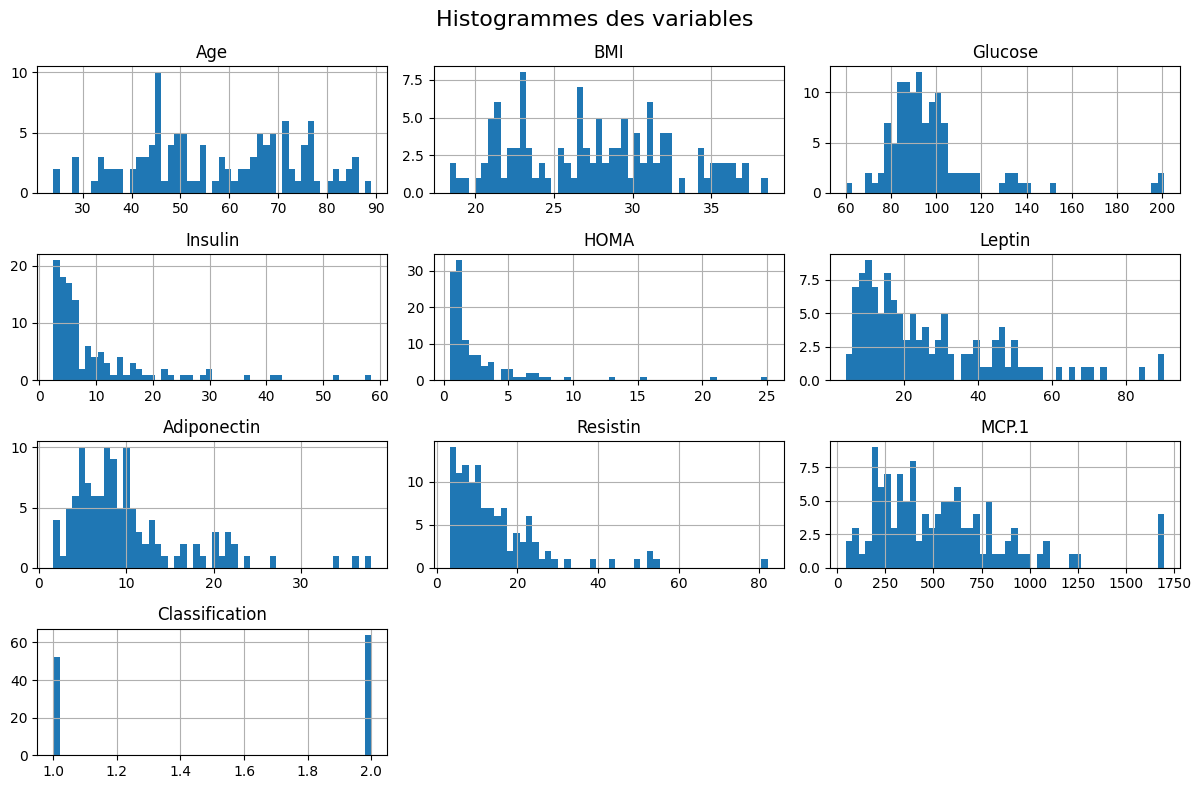

In [32]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('breast+cancer+coimbra/dataR2.csv')

# Aperçu des données
print(data.shape)
print(data.head())
data.info()

# Liste des variables explicatives
features = data.columns[:-1]
print("Les variables explicative sont :", list(features))
target = 'Classification'

# Histogrammes des variables
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histogrammes des variables", fontsize=16)
plt.tight_layout()
plt.show()


Nous utilisons ici les données du dataset *Breast Cancer Coimbra*, qui contient des mesures biométriques de 116 patientes. L’objectif est de prédire si une patiente est atteinte d’un cancer du sein ou non, à partir de neuf variables biologiques.

### Aperçu du dataset

Le jeu de données contient 116 observations et 10 variables, dont :
- **9 variables explicatives** continues : `Age`, `BMI`, `Glucose`, `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, `MCP.1`.
- **1 variable cible** : `Classification`, qui prend la valeur `1` si la patiente est atteinte d’un cancer (positive) et `2` sinon (négative).

Les données ne présentent pas de valeurs manquantes, ce qui permet de procéder directement à l’analyse exploratoire.

### Distribution des variables

La distribution des variables a été visualisée à l’aide d’histogrammes :

- Certaines variables présentent une **distribution asymétrique** avec des valeurs extrêmes, notamment `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin` et `MCP.1`. Cela pourra motiver une **transformation des données** ou une **normalisation** avant apprentissage.
- La variable `Classification` est **déséquilibrée**, avec une majorité de patientes saines (`2`). Cette information est importante car elle aura un impact sur le **choix des métriques d’évaluation** : une simple précision (`accuracy`) ne sera pas suffisante pour juger de la qualité des modèles.

Nous allons désormais préparer les données pour l'entraînement des modèles, en séparant les features et la cible, et en effectuant un **split stratifié** du jeu de données.


# Étape 2 — Split du dataset en train et test


In [ ]:
from sklearn.model_selection import train_test_split
# Séparation des features et de la cible
X = data.drop(columns='Classification')
y = data['Classification'].map({2: 0, 1: 1})
# Mapping : 1 = patient malade (positif), 2 = patient sain (négatif)
# On recode pour avoir : 1 → malade (classe positive), 0 → sain


# Split stratifié pour préserver la distribution des classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Vérification de la forme
print("Train :", X_train.shape, y_train.shape)
print("Test  :", X_test.shape, y_test.shape)


Train : (92, 9) (92,)
Test  : (24, 9) (24,)


Nous commençons par séparer les variables explicatives (features) de la variable cible (`Classification`), en recodant cette dernière pour faciliter l'interprétation des résultats :
- `1` : patiente malade (classe positive),
- `0` : patiente saine (classe négative).

Un **split stratifié** a été effectué à l’aide de la fonction `train_test_split` de `scikit-learn`, afin de préserver la proportion initiale des classes dans les ensembles d’entraînement et de test. Cela est particulièrement important ici compte tenu du **déséquilibre de classes** observé.

Les tailles obtenues sont :
- **Ensemble d'entraînement** : 92 observations
- **Ensemble de test** : 24 observations

Ce découpage correspond à une répartition classique de 80% / 20%.


# Étape 3 — Visualisation des distributions par classe du dataset d'entrainement

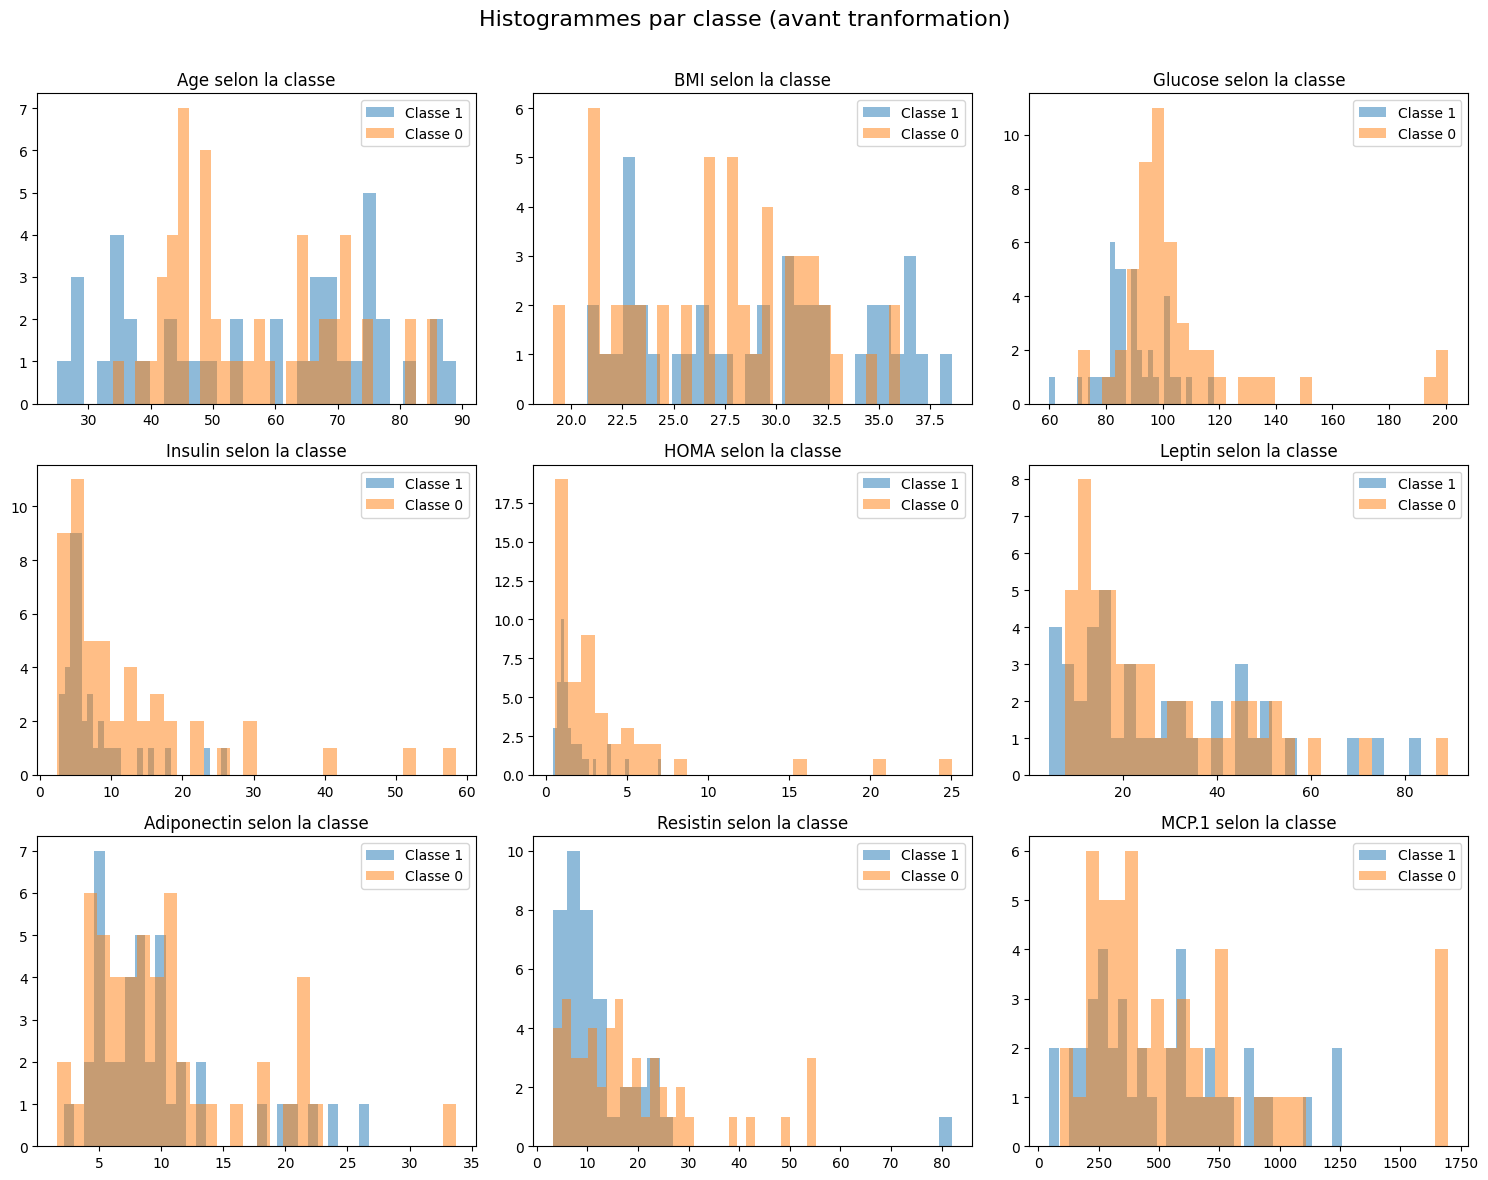

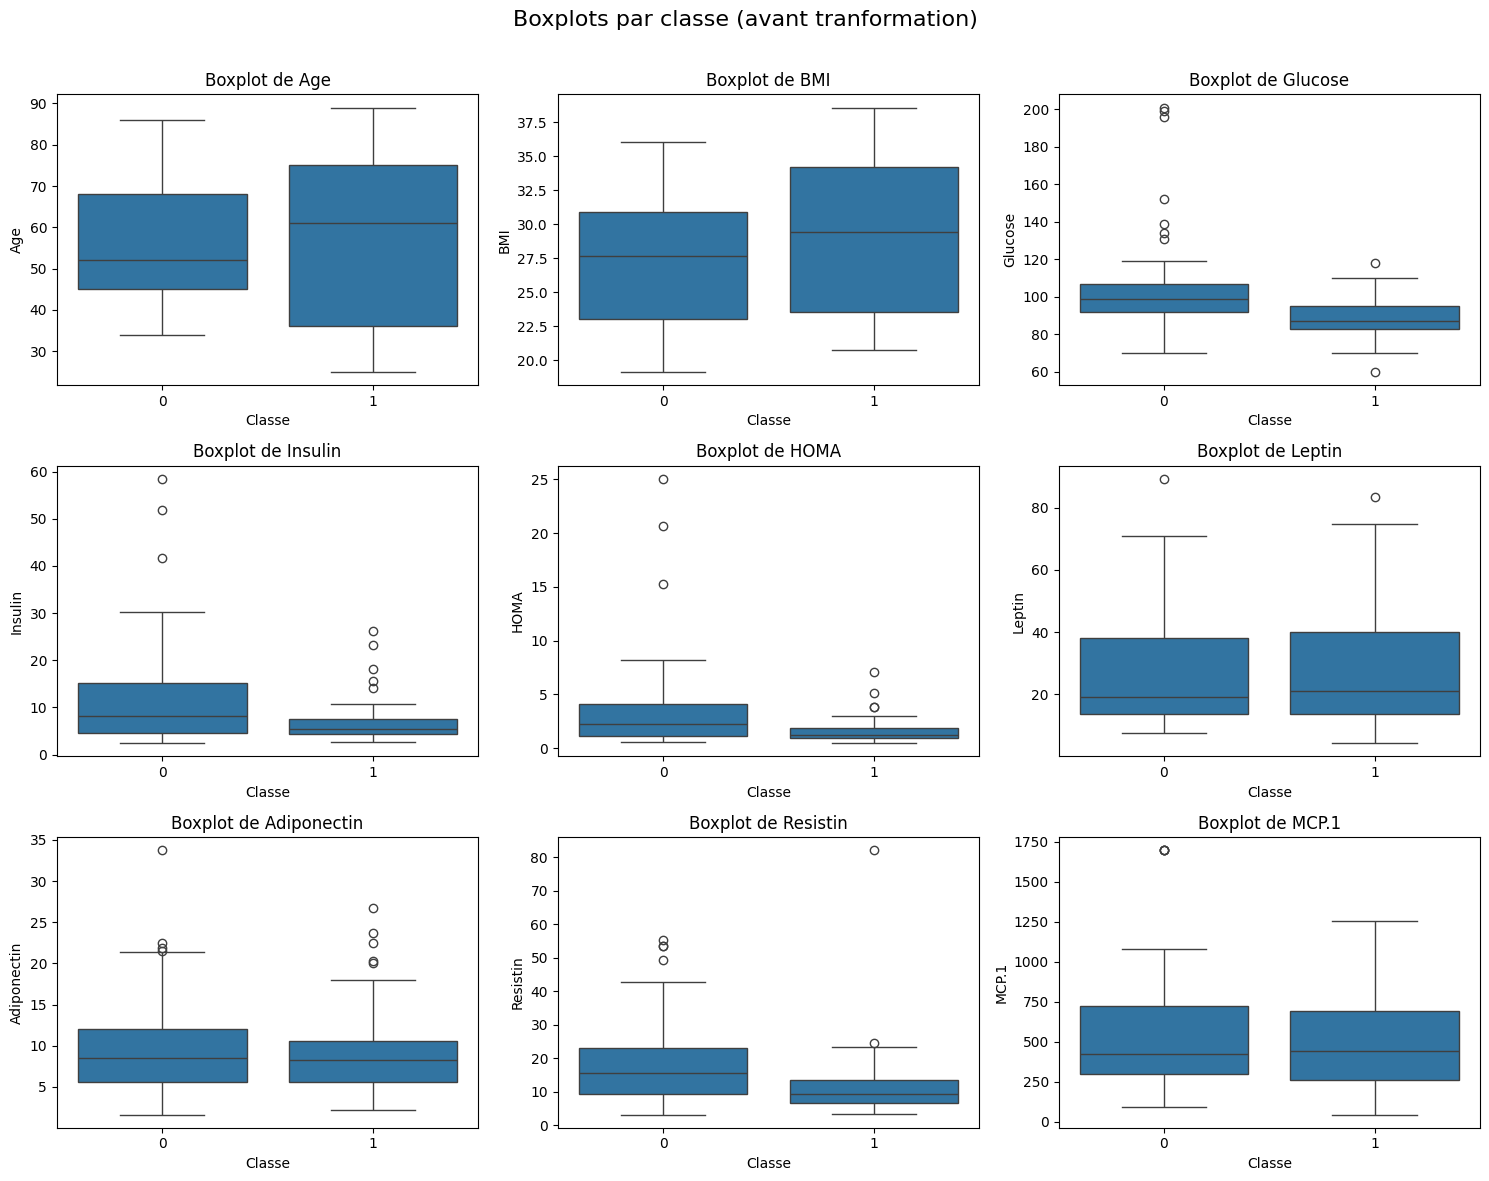

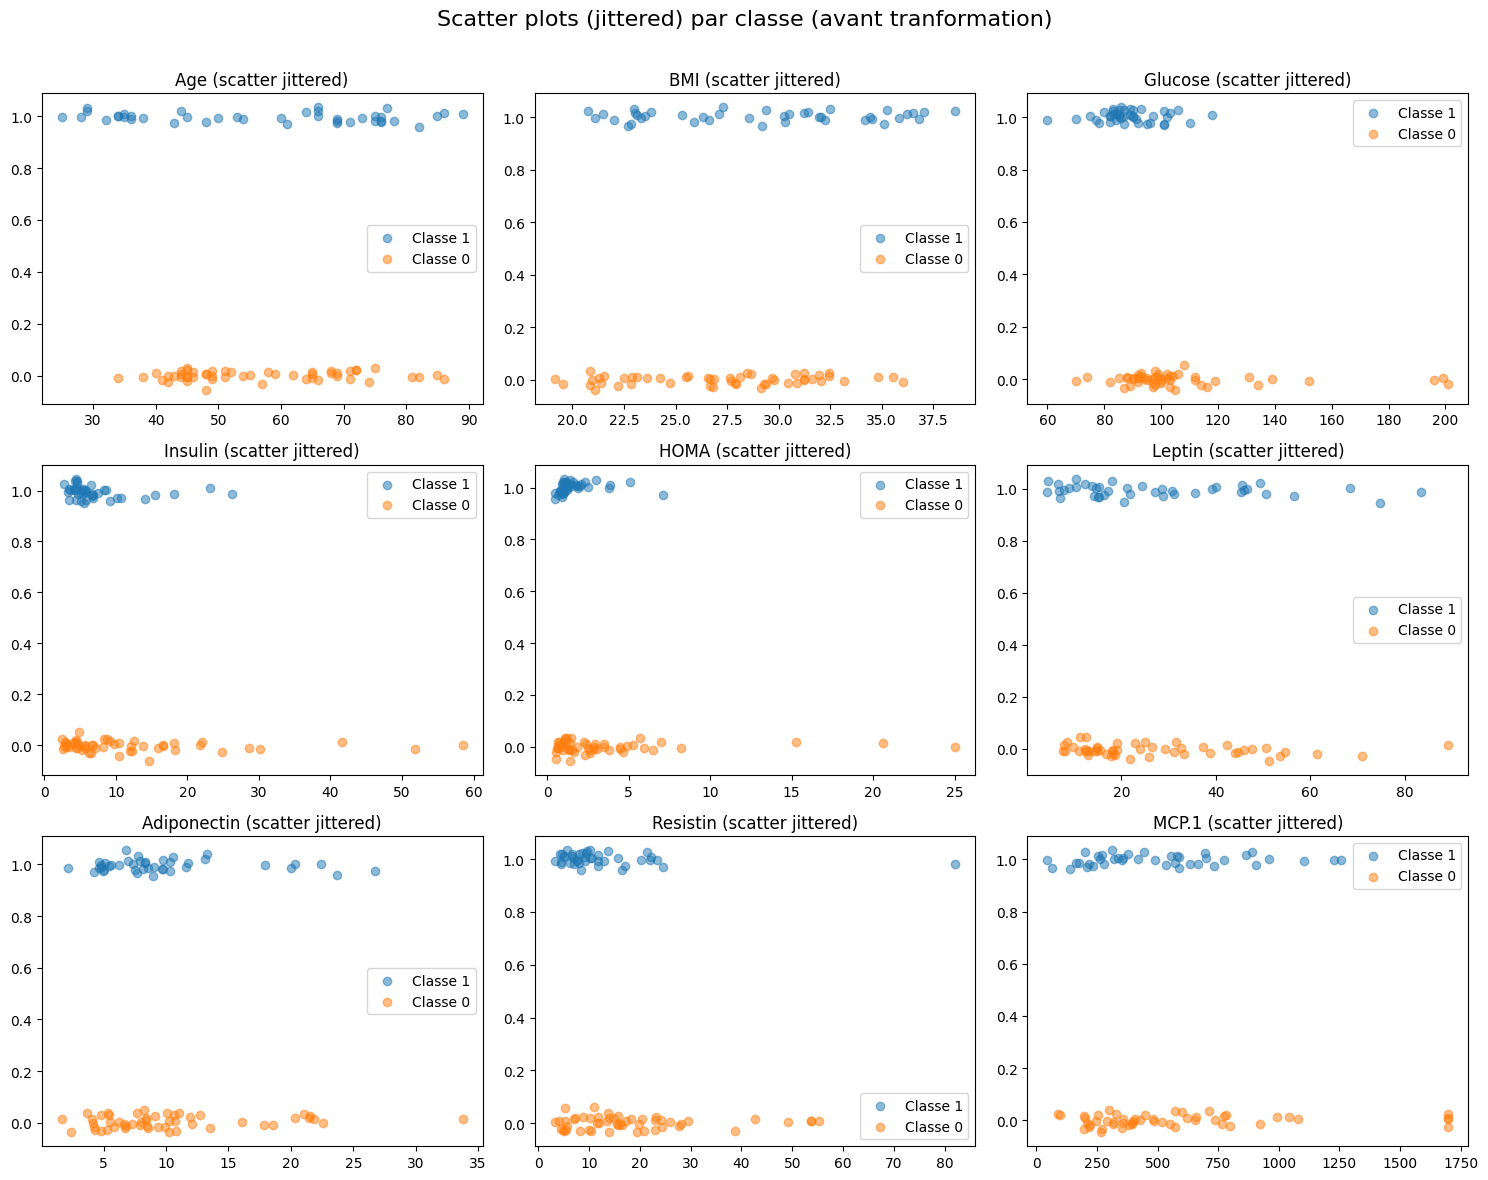

In [31]:
# Fusion temporaire pour les visualisations
train_data = X_train.copy()
train_data['Classification'] = y_train

variables = X_train.columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))


# Histogrammes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for classe in y_train.unique():
        axes[i].hist(X_train[y_train == classe][col], bins=30, alpha=0.5, label=f"Classe {classe}")
    axes[i].set_title(f"{col} selon la classe")
    axes[i].legend()
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogrammes par classe (avant tranformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots par classe (avant tranformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Scatter plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for classe in y_train.unique():
        axes[i].scatter(
            X_train[y_train == classe][col],
            np.random.normal(loc=classe, scale=0.02, size=X_train[y_train == classe][col].shape),
            alpha=0.5,
            label=f"Classe {classe}"
        )
    axes[i].set_title(f"{col} (scatter jittered)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Scatter plots (jittered) par classe (avant tranformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Afin de mieux comprendre les différences entre les patientes malades (`Classe 1`) et les patientes saines (`Classe 0`), nous avons représenté les distributions des variables explicatives en les segmentant par classe. Trois types de visualisations complémentaires ont été produits : histogrammes, boxplots et scatter plots jittered.

### Histogrammes par classe

Les histogrammes permettent d'observer la distribution des valeurs au sein de chaque classe. Plusieurs variables présentent des décalages notables entre les deux groupes, notamment :
- **Age** : les patientes malades ont tendance à être légèrement plus âgées.
- **Resistin**, **MCP.1** et **Adiponectin** semblent présenter des décalages de densité entre les deux classes, suggérant un potentiel pouvoir discriminant.
- À l'inverse, des variables comme **BMI** ou **Leptin** montrent une forte superposition entre les classes.

Ces observations qualitatives suggèrent que certaines variables pourraient être informatives, mais **aucune ne permet à elle seule une séparation nette**.

### Boxplots par classe

Les boxplots permettent une évaluation visuelle plus précise des différences de distribution :
- La majorité des variables présentent une **forte dispersion** avec de nombreux **outliers** visibles dans les deux classes, en particulier pour `Insulin`, `Leptin` et `MCP.1`.
- **Les médianes sont proches**, mais on note quelques différences de tendance (ex. `Resistin` plus élevée pour la classe 1).

Ces éléments indiquent une **variance importante intra-classe**, ce qui pourrait affecter les performances de modèles sensibles aux échelles non standardisées.

### Scatter plots (jittered)

Ces visualisations montrent explicitement la séparation verticale entre les classes (0 ou 1) :
- Aucune variable seule ne suffit à séparer totalement les classes.
- Certains regroupements apparaissent (ex. des valeurs faibles de `Insulin`, `HOMA`, `Adiponectin` associées à la classe 0), mais avec un **chevauchement significatif**.

---

###  Bilan de l’analyse exploratoire

- Les variables semblent contenir **un signal partiel**, mais nécessiteront d’être **combinées dans un modèle multivarié** pour exploiter au mieux les interactions.
- La présence d’**outliers**, de **distributions asymétriques** et de **valeurs sur des échelles très différentes** justifie :
  - une **standardisation préalable** des variables,
  - et éventuellement une **transformation** logarithmique pour certaines (ex. `Insulin`, `Leptin`, `HOMA`).
- Enfin, la forte **superposition inter-classe** implique que la séparation linéaire pourrait être limitée, ce qui motivera l’usage de modèles non linéaires.

Cette étape exploratoire permet donc de motiver rigoureusement les choix de **prétraitement** et de **modélisation supervisée** qui suivront.


# Étape 4 — Matrice de corrélation et scatter matrix (train uniquement)

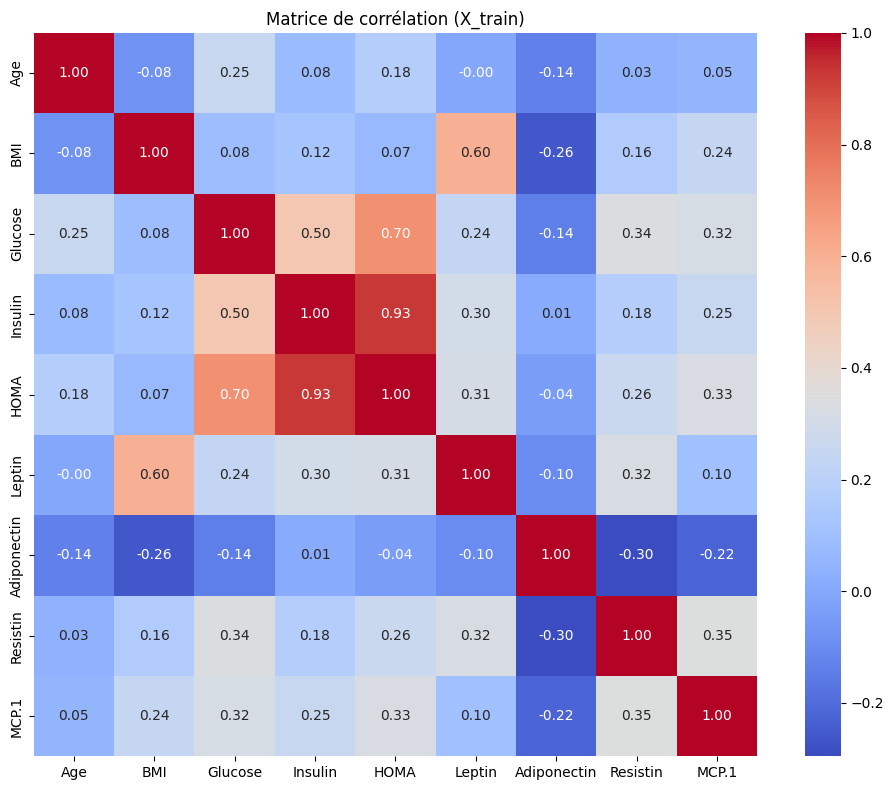

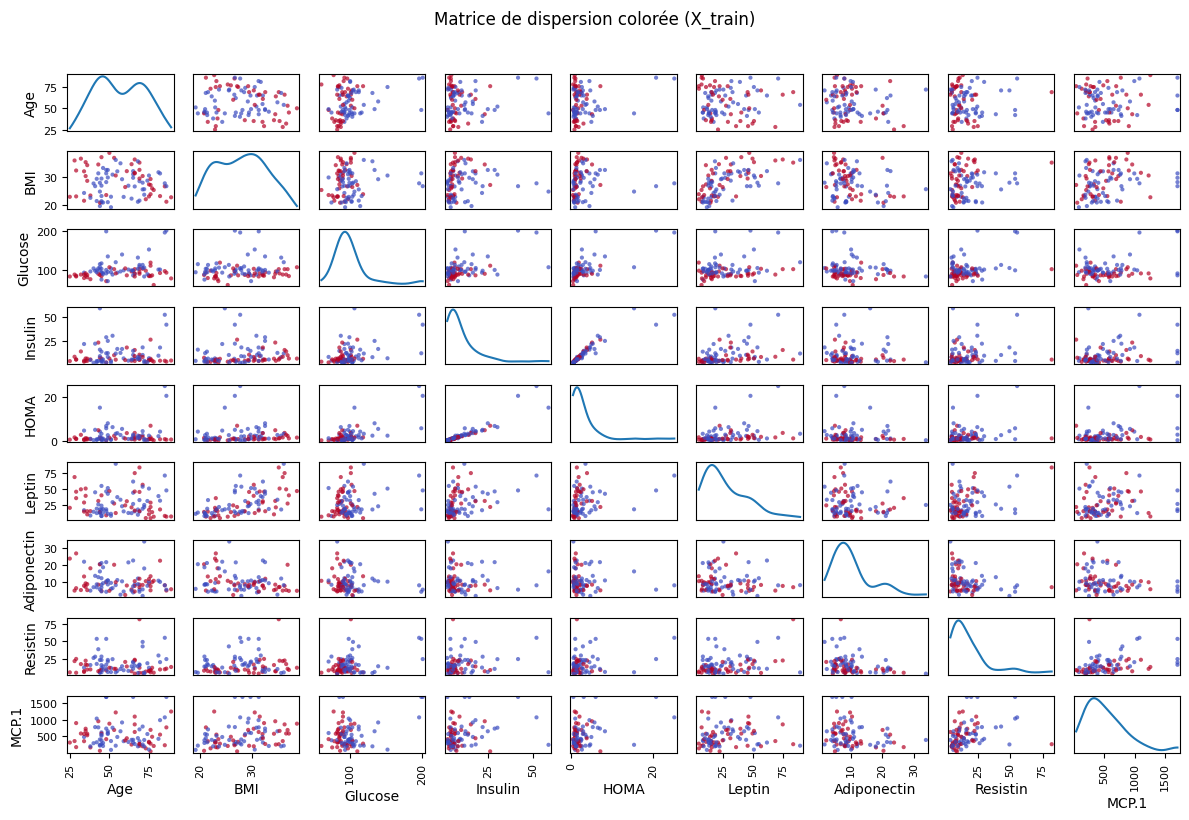

In [24]:
from pandas.plotting import scatter_matrix
# Matrice de corrélation (sur les données d'entraînement)
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation (X_train)")
plt.tight_layout()
plt.show()

# DataFrame combiné pour visualisation colorée
X_train_visu = X_train.copy()
X_train_visu['Classification'] = y_train.values

# Scatter matrix colorée
scatter_matrix(X_train_visu.drop(columns='Classification'),
               figsize=(12, 8),
               diagonal='kde',
               c=X_train_visu['Classification'],
               cmap='coolwarm',
               alpha=0.7)
plt.suptitle("Matrice de dispersion colorée (X_train)", y=1.02)
plt.tight_layout()
plt.show()



Afin d’examiner la redondance potentielle entre les variables et d’anticiper les risques de multicolinéarité, nous avons étudié les relations linéaires entre les variables explicatives à l’aide de deux outils complémentaires :

### Matrice de corrélation

La matrice de corrélation permet d’identifier les relations linéaires entre les variables continues. On observe notamment :

- Une **corrélation très forte** entre `Insulin` et `HOMA` (ρ ≈ 0.93), ce qui est attendu puisque HOMA est une fonction de l’insuline et de la glycémie (`HOMA = (Glucose × Insulin) / 405`).
- Des corrélations modérées entre :
  - `Glucose` et `HOMA` (ρ ≈ 0.70),
  - `BMI` et `Leptin` (ρ ≈ 0.60).
- Les autres paires présentent des corrélations relativement faibles (ρ < 0.4), ce qui suggère que **la majorité des variables apportent une information complémentaire**.

Cette analyse nous incite à envisager éventuellement une **réduction de dimension** ou une **sélection de variables**, en particulier si certaines méthodes sont sensibles à la colinéarité (ex. régression logistique).

### Matrice de dispersion colorée

La scatter matrix, colorée selon la classe (`Classification`), donne une vision globale des interactions deux-à-deux entre variables, tout en mettant en évidence les regroupements selon la classe.

- On note un **chevauchement significatif** entre les deux classes dans la majorité des projections planes.
- Quelques combinaisons de variables, comme (`Resistin`, `MCP.1`) ou (`Adiponectin`, `HOMA`), montrent des séparations partielles entre les classes, sans pour autant être suffisantes pour une séparation nette.

---

### Conclusion de cette étape

- Il n’existe pas de **séparation linéaire évidente** entre les deux classes sur les paires de variables.
- La structure du jeu de données suggère que des méthodes multivariées pourront tirer profit de **relations complexes**, éventuellement **non linéaires**.
- La **standardisation** sera nécessaire avant d’appliquer certaines méthodes sensibles aux échelles (SVM, k-NN, PCA...).

Nous passons maintenant à l’étape de prétraitement (standardisation des données), avant de comparer différentes méthodes d’apprentissage supervisé.


# Étape 5 — Transformation logarithmique 

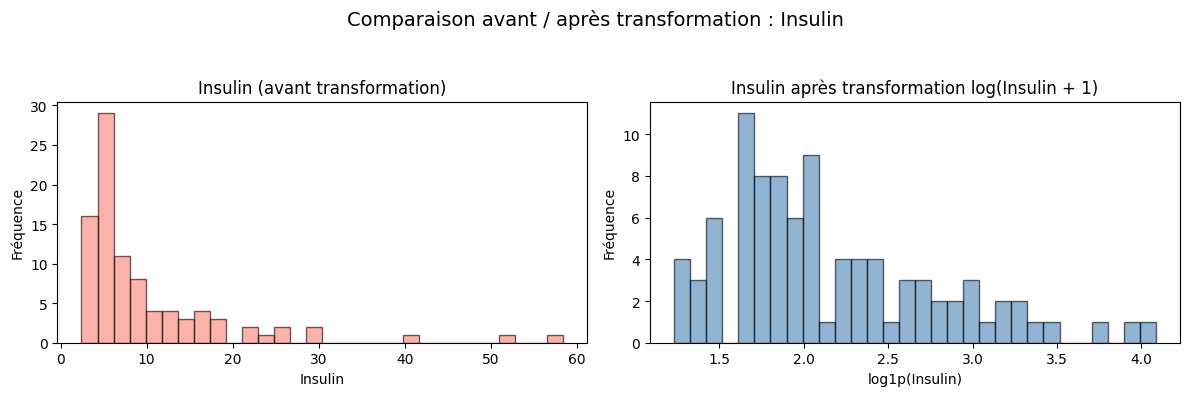

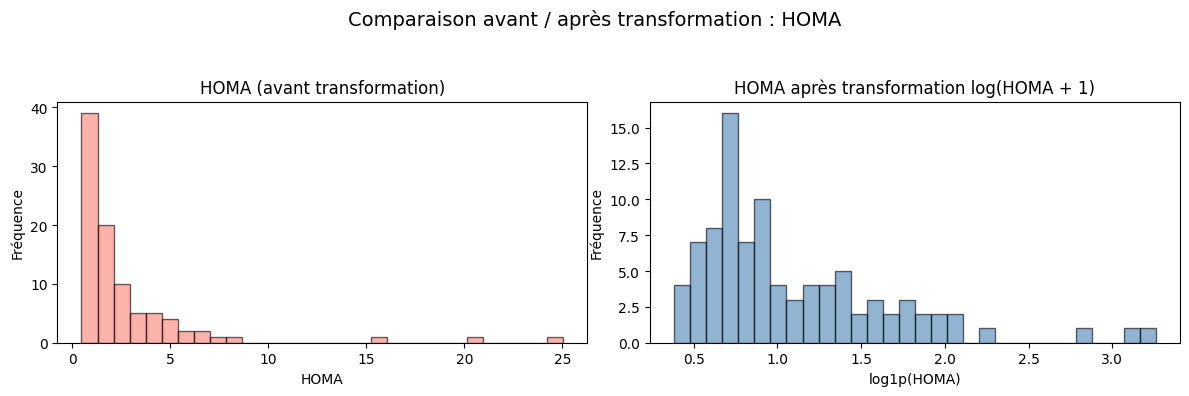

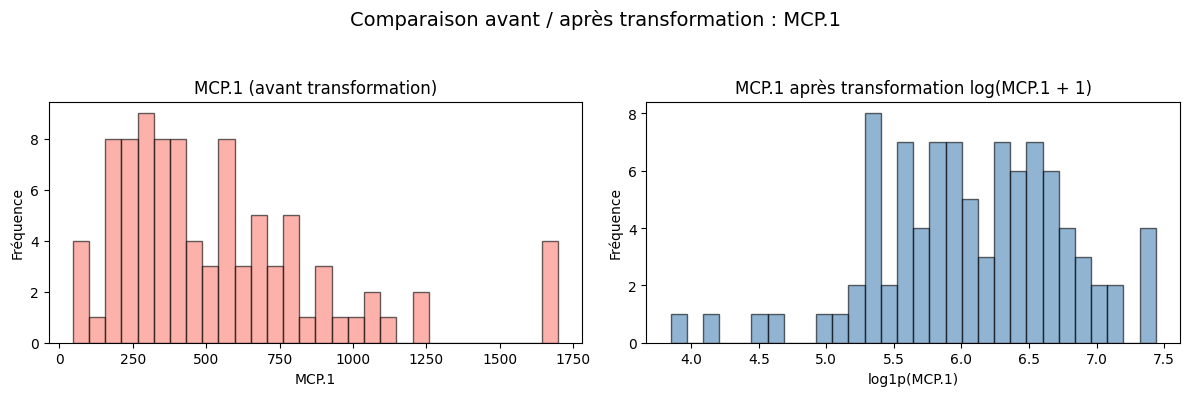

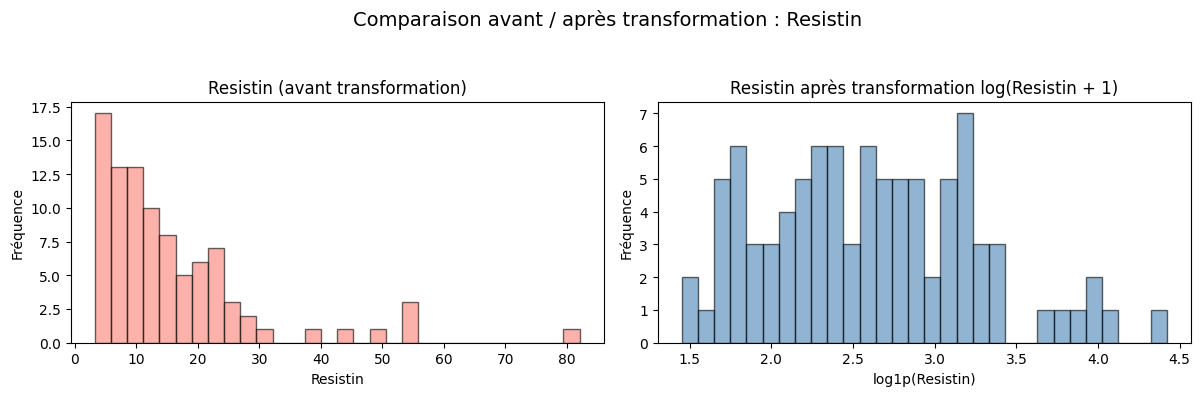

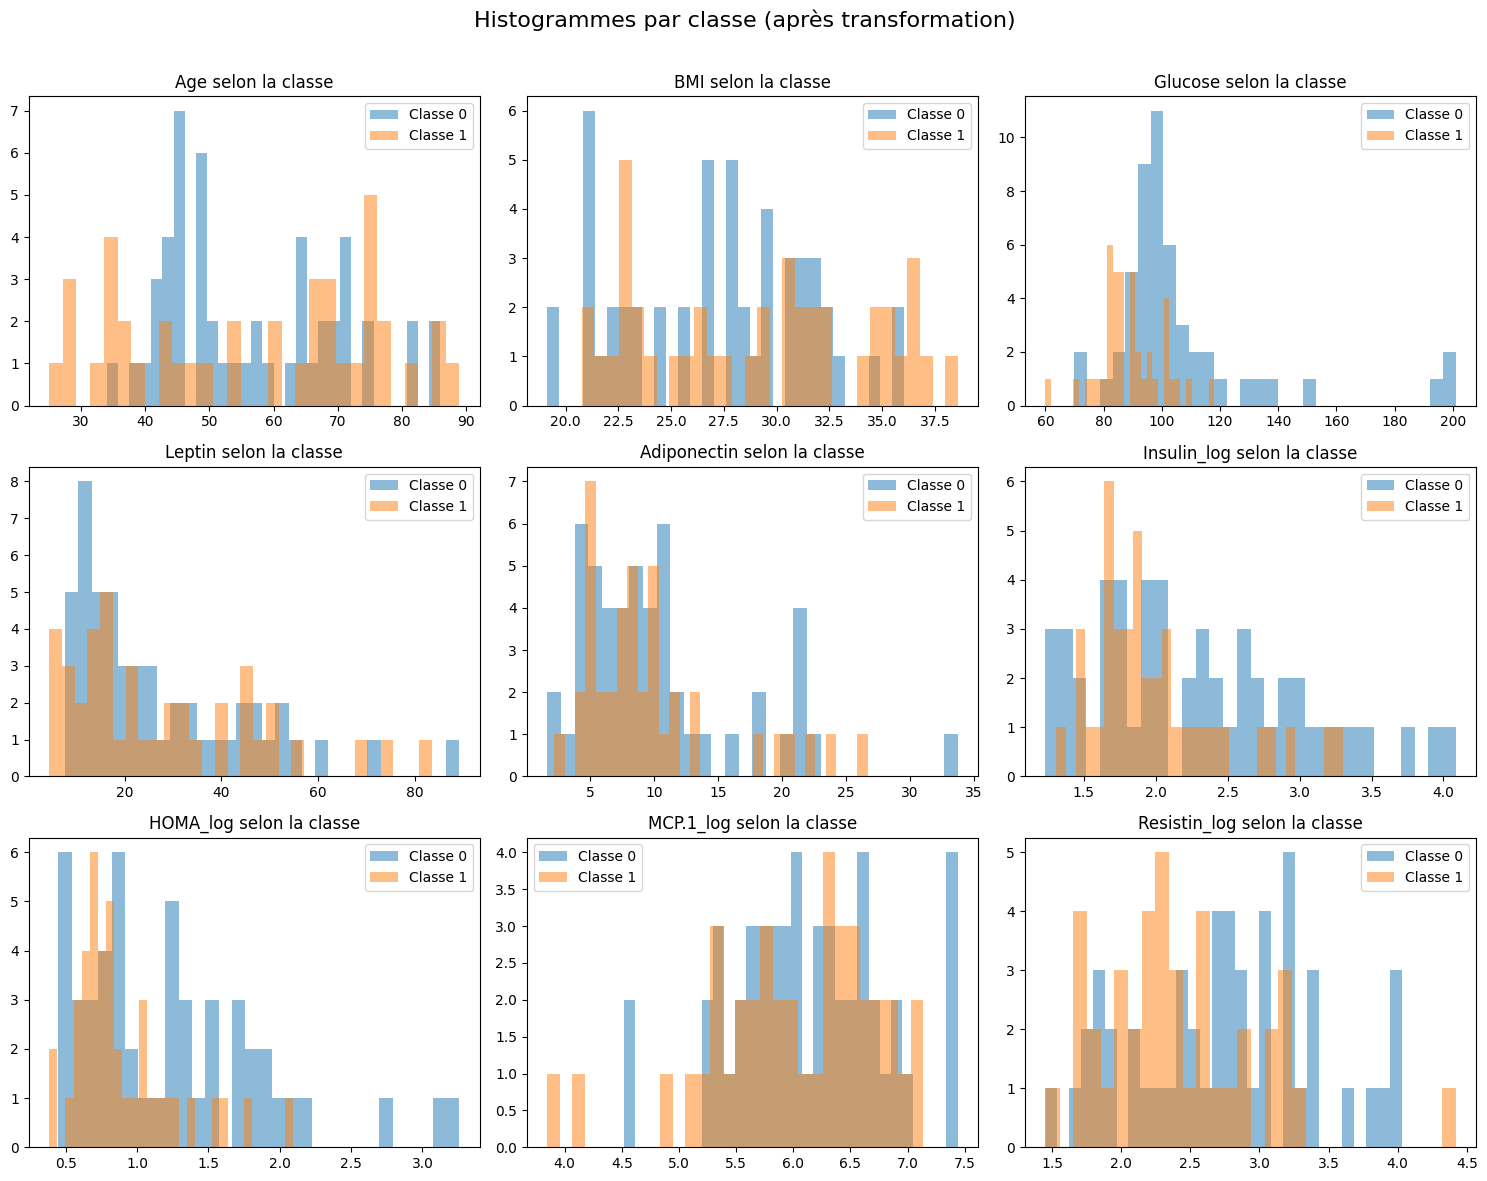

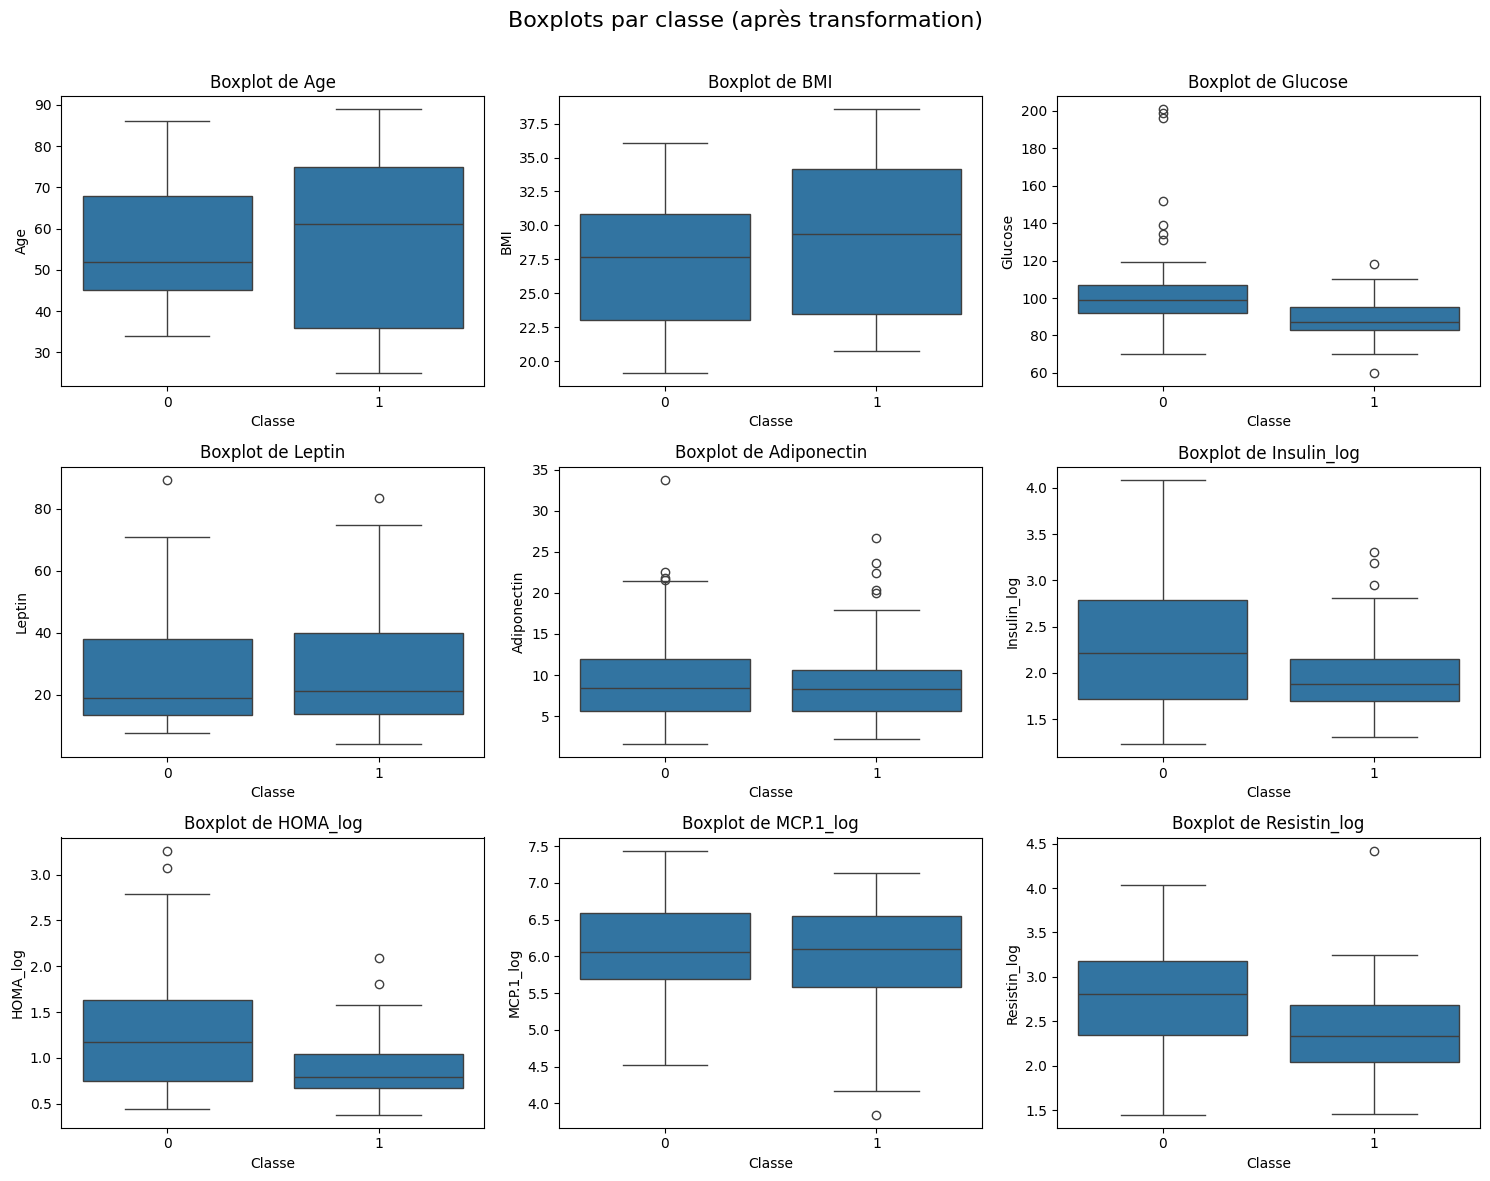

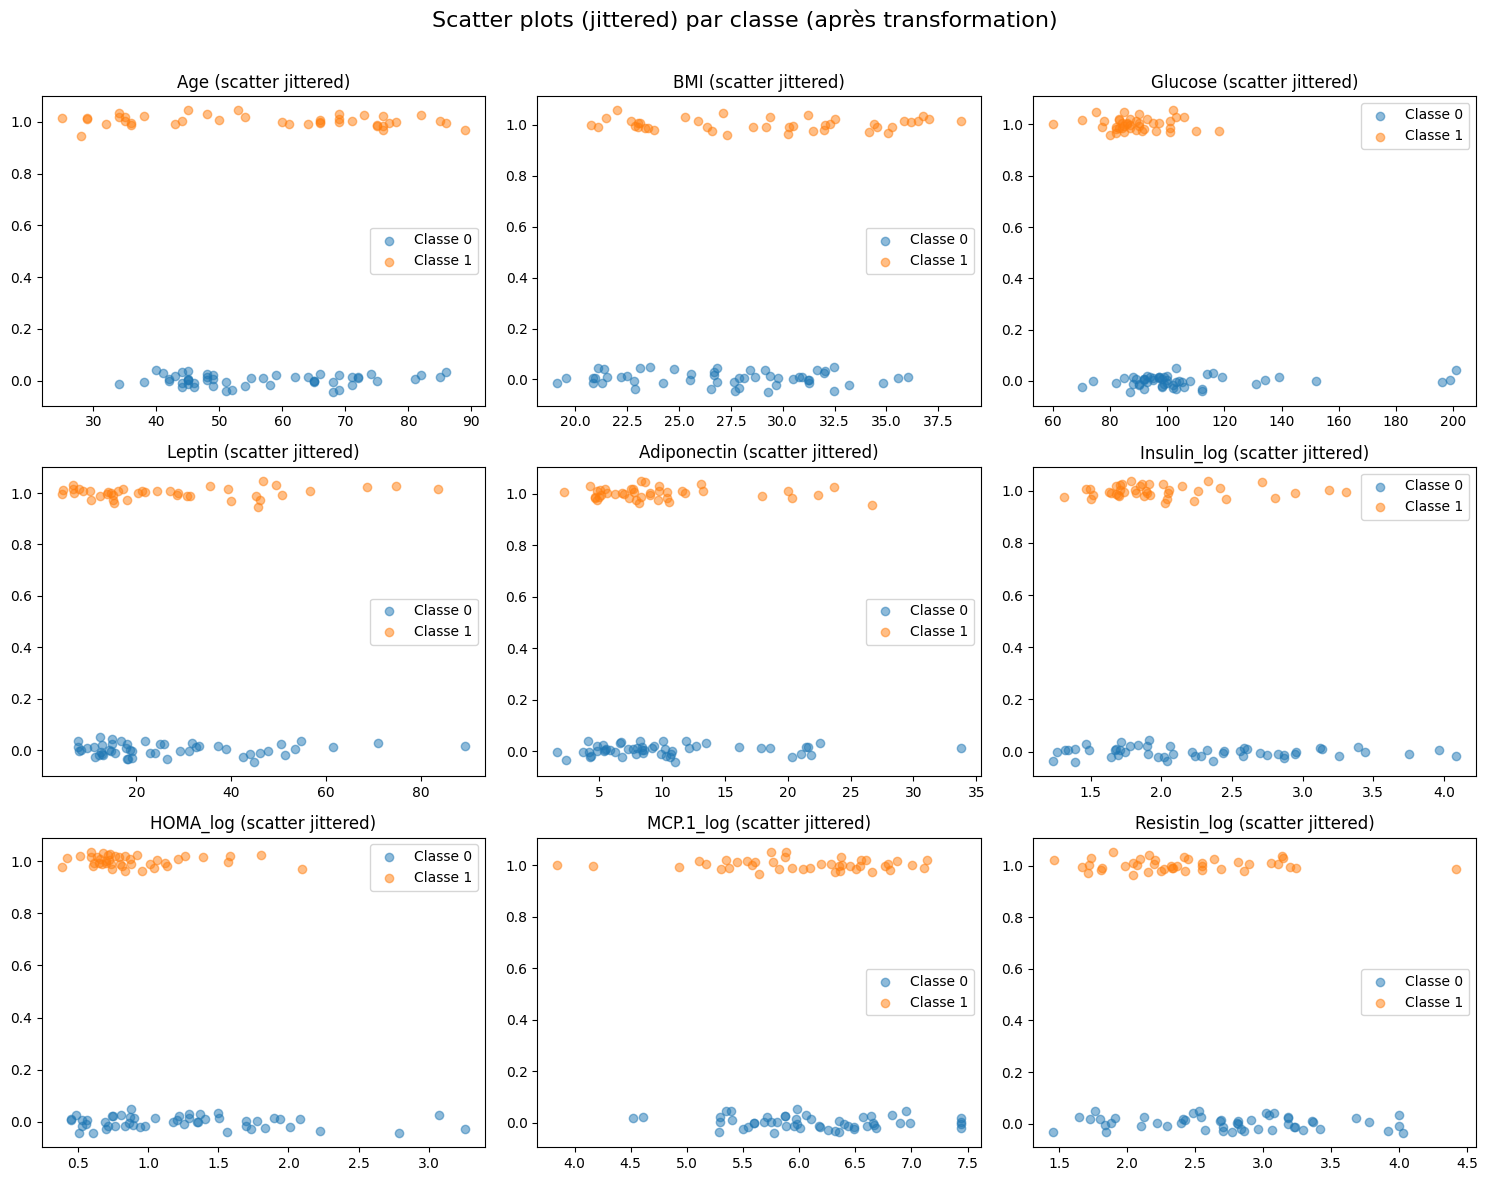

In [ ]:
# Liste des variables à transformer (asymétriques)
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Comparaison avant / après (1 figure par variable)
for col in variables_log:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Avant transformation
    axes[0].hist(X_train[col], bins=30, alpha=0.6, color='salmon', edgecolor='black')
    axes[0].set_title(f"{col} (avant transformation)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence")

    # Après transformation log1p
    transformed = np.log1p(X_train[col])
    axes[1].hist(transformed, bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[1].set_title(f"{col} après transformation log({col} + 1)")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("Fréquence")

    plt.suptitle(f"Comparaison avant / après transformation : {col}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Application de la transformation à X_train
X_train_transformed = X_train.copy()
for col in variables_log:
    X_train_transformed[col + '_log'] = np.log1p(X_train[col])
X_train_transformed = X_train_transformed.drop(columns=variables_log)

# Mise à jour des features transformées
features = X_train_transformed.columns.tolist()

# Fusion avec y_train pour faciliter les visualisations
train_data2 = X_train_transformed.copy()
train_data2['Classification'] = y_train.values

# Histogrammes par classe
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for classe in [0, 1]:
        axes[i].hist(train_data2[train_data2['Classification'] == classe][col], 
                     bins=30, alpha=0.5, label=f"Classe {classe}")
    axes[i].set_title(f"{col} selon la classe")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogrammes par classe (après transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots par classe

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Classification', y=col, data=train_data2, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots par classe (après transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Scatter plots jittered par classe

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for classe in [0, 1]:
        values = train_data2[train_data2['Classification'] == classe][col]
        jittered_y = np.random.normal(loc=classe, scale=0.02, size=values.shape)
        axes[i].scatter(values, jittered_y, alpha=0.5, label=f"Classe {classe}")
    axes[i].set_title(f"{col} (scatter jittered)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Scatter plots (jittered) par classe (après transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



### Objectif

L'analyse exploratoire initiale a révélé une **asymétrie marquée** (distribution fortement étalée à droite) pour plusieurs variables : `Insulin`, `HOMA`, `MCP.1` et `Resistin`.  
Ces distributions comportaient de nombreuses valeurs extrêmes susceptibles de nuire à l’apprentissage de certains modèles (régression logistique, k-NN, SVM...) sensibles aux écarts de grandeur ou à la non-normalité.

Afin de rendre ces distributions plus symétriques et de réduire l’impact des valeurs extrêmes, nous avons appliqué une **transformation logarithmique** de type `log(x + 1)` à l’aide de la fonction `np.log1p`.

---

### Comparaison avant / après transformation

Pour chaque variable transformée, nous avons comparé la distribution **avant et après transformation** à l’aide d’un histogramme :

- On observe que les longues traînes à droite sont **fortement atténuées**.
- Les distributions deviennent **plus compactes, moins asymétriques** et souvent plus proches d’une forme gaussienne.
- Cela améliore l’homogénéité du jeu de données et facilite les étapes de **standardisation** ultérieures.

Ces figures constituent une **justification visuelle explicite** de l’intérêt de la transformation logarithmique.

---

### Mise à jour du jeu de données

Les nouvelles variables transformées (`Insulin_log`, `HOMA_log`, `MCP.1_log`, `Resistin_log`) ont été ajoutées au jeu de données, et les anciennes supprimées pour éviter toute redondance.

---

### Visualisation des variables transformées par classe

Afin d’observer l’effet de cette transformation sur la répartition des valeurs dans les deux classes (malade / sain), nous avons reproduit plusieurs visualisations sur les variables transformées :

#### • Histogrammes par classe  
Ces histogrammes permettent de visualiser les densités relatives dans chaque classe, après transformation.  
On constate que certaines variables, notamment `Insulin_log` et `Resistin_log`, présentent toujours des différences de densité entre les classes, mais avec une **distribution beaucoup plus régulière**.

#### • Boxplots par classe  
La transformation log réduit clairement l'impact des **outliers visibles** dans les boxplots.  
Les médianes sont plus représentatives et les intervalles interquartiles moins éclatés.

#### • Scatter plots jittered  
Ces visualisations montrent que les points restent bien séparés verticalement entre les classes 0 et 1, tout en bénéficiant d’une **distribution horizontale plus contrôlée**, ce qui est favorable aux modèles à base de distance.

---

### Conclusion

L’application de la transformation logarithmique a permis de :
- Réduire les effets des valeurs extrêmes,
- Stabiliser la variance,
- Améliorer la structure géométrique du jeu de données en vue de la standardisation et de l'apprentissage.

Ces transformations constituent une **étape essentielle du pipeline de prétraitement** avant la construction des modèles.


# Étape 6 — Standardisation (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialisation du scaler
scaler = StandardScaler()

# Entraînement du scaler sur le jeu transformé
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_transformed),
    columns=X_train_transformed.columns,
    index=X_train_transformed.index
)

X_train_scaled.describe().T[['mean', 'std']]


mean       std
Age           1.037817e-16  1.005479
BMI          -8.447349e-17  1.005479
Glucose       1.995309e-16  1.005479
Leptin        6.033821e-17  1.005479
Adiponectin   1.436049e-16  1.005479
Insulin_log   2.292852e-16  1.005479
HOMA_log     -3.891814e-16  1.005479
MCP.1_log    -7.406515e-16  1.005479
Resistin_log -1.680419e-16  1.005479

### Objectif

Après transformation logarithmique des variables asymétriques, nous appliquons une **standardisation** à l’ensemble des variables explicatives du jeu d’entraînement.  
Cette étape vise à **mettre toutes les variables sur une même échelle**, en les centrant autour de 0 et en les réduisant à une variance unitaire.

La standardisation est particulièrement importante pour les modèles sensibles aux distances ou aux écarts d’échelle, tels que :
- la régression logistique (convergence plus stable),
- le SVM,
- les k plus proches voisins (k-NN),
- les méthodes de régularisation (Ridge, Lasso),
- ou encore les techniques de réduction de dimension (PCA, etc.).

---
### Méthode

La transformation utilisée est la standardisation classique (Z-score), via la formule :

$$
X^{(i)}_{\text{std}} = \frac{X^{(i)} - \mu^{(i)}}{\sigma^{(i)}}
$$

où \( \mu^{(i)} \) et \( \sigma^{(i)} \) désignent respectivement la moyenne et l’écart-type de la variable \( X^{(i)} \) sur l’ensemble d’entraînement.

Nous utilisons l’outil `StandardScaler` de `scikit-learn`, appliqué uniquement sur les données d’entraînement (`fit_transform`) pour éviter toute fuite d’information.



# Étape 7 — Préparation de X_test

In [ ]:
# Copie de X_test
X_test_transformed = X_test.copy()

# Appliquer les mêmes log-transforms
for col in variables_log:
    X_test_transformed[col + '_log'] = np.log1p(X_test_transformed[col])

# Supprimer les colonnes originales
X_test_transformed = X_test_transformed.drop(columns=variables_log)

# Standardiser avec le scaler déjà entraîné sur X_train
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_transformed),
    columns=X_test_transformed.columns,
    index=X_test_transformed.index
)

# Vérifie que les colonnes de X_test sont identiques (et dans le même ordre) à celles de X_train, pour éviter des erreurs de prédiction
if list(X_train_scaled.columns) != list(X_test_scaled.columns):
    print( "Mismatch between train and test columns")


Les transformations précédemment appliquées sur le jeu d'entraînement (logarithmisation + standardisation) doivent être reproduites **exactement à l’identique** sur le jeu de test, sans réestimer les paramètres.

### Étapes réalisées :
1. **Transformation logarithmique** sur les mêmes variables (`Insulin`, `HOMA`, `MCP.1`, `Resistin`), via `log(x + 1)` ;
2. **Suppression des variables brutes** pour éviter la redondance ;
3. **Standardisation avec les mêmes paramètres** (`μ`, `σ`) appris sur `X_train`, à l’aide de `scaler.transform()`.

Nous avons également vérifié que les **colonnes de `X_test_scaled` sont strictement les mêmes (et dans le même ordre)** que celles de `X_train_scaled`, afin de garantir la compatibilité avec les modèles d’apprentissage.

---

Cette étape complète le pipeline de prétraitement et nous permet désormais de passer à la **modélisation supervisée**.


# Étape 8 — Modélisation avec LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialisation et entraînement du modèle sans régularisation explicite
logreg_simple = LogisticRegression(random_state=42)
logreg_simple.fit(X_train_scaled, y_train)

# Prédictions sur le jeu de test
y_pred_simple = logreg_simple.predict(X_test_scaled)

# Évaluation des performances de base
print("Évaluation du modèle simple (régression logistique)")
print("Accuracy :", round(accuracy_score(y_test, y_pred_simple), 3))
print("F1-score :", round(f1_score(y_test, y_pred_simple), 3))
print("\nClassification report :\n", classification_report(y_test, y_pred_simple))


Évaluation du modèle simple (régression logistique)
Accuracy : 0.792
F1-score : 0.783

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.75      0.82      0.78        11

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.80      0.79      0.79        24



Nous commençons par entraîner un modèle de régression logistique simple, sans régularisation explicite, sur les données prétraitées (après transformation log et standardisation).

### Objectif

Prédire la probabilité qu’une patiente soit atteinte d’un cancer à partir des neuf variables explicatives.  
La régression logistique est un modèle linéaire interprétable, particulièrement adapté pour une première approche supervisée.

### Résultats sur le jeu de test

Le modèle a été évalué sur l’ensemble de test après entraînement sur les données standardisées. Les résultats sont les suivants :

- **Accuracy** : 0.792
- **F1-score** : 0.783

### Détails du rapport de classification :

| Classe | Précision | Rappel | F1-score | Support |
|--------|-----------|--------|----------|---------|
| 0 (sain) | 0.83 | 0.77 | 0.80 | 13 |
| 1 (malade) | 0.75 | 0.82 | 0.78 | 11 |

- **Macro avg F1** : 0.79
- **Weighted avg F1** : 0.79

Ces résultats montrent un bon équilibre entre précision et rappel, ce qui est important dans un contexte médical.  
Cependant, ce modèle simple ne prend pas en compte d’éventuelles interactions entre variables ni d’optimisation des hyperparamètres, ce qui sera abordé dans les étapes suivantes.

---


# Étape 9 — Validation croisée sur les données d'entraînement


Validation croisée (10 folds)
F1-score moyen : 0.696 ± 0.187
Accuracy moyen : 0.731 ± 0.175


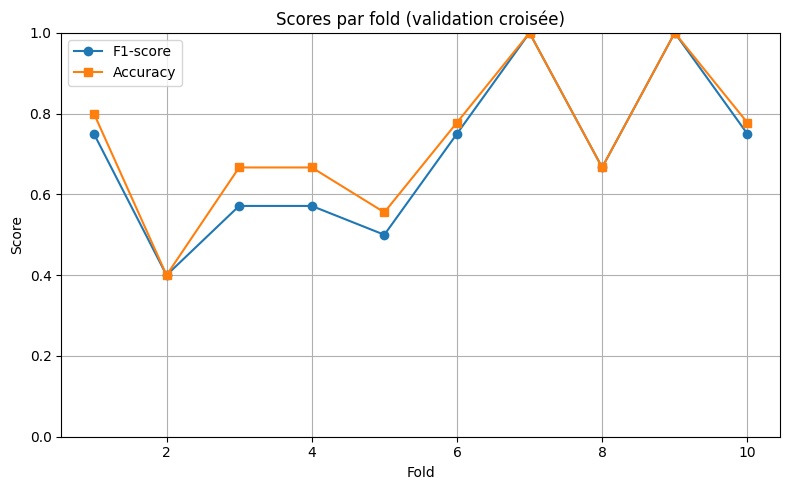

In [ ]:
from sklearn.model_selection import cross_val_score

# Validation croisée (10 folds) sur le modèle simple
f1_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='f1')
acc_scores = cross_val_score(logreg_simple, X_train_scaled, y_train, cv=10, scoring='accuracy')

# Résumé
print("Validation croisée (10 folds)")
print(f"F1-score moyen : {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")
print(f"Accuracy moyen : {acc_scores.mean():.3f} ± {acc_scores.std():.3f}")

# Visualisation des scores par fold
folds = range(1, len(f1_scores) + 1)
plt.figure(figsize=(8, 5))
plt.plot(folds, f1_scores, marker='o', label='F1-score')
plt.plot(folds, acc_scores, marker='s', label='Accuracy')
plt.title("Scores par fold (validation croisée)")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Afin d'évaluer la stabilité du modèle de régression logistique et sa capacité de généralisation, nous avons effectué une **validation croisée à 10 plis** (k-fold CV).  
Deux métriques principales ont été suivies : **le F1-score** (adapté au contexte de déséquilibre de classes) et **l'accuracy** (exactitude globale).

### Résultats de la validation croisée

- **F1-score moyen** : 0.696 ± 0.187
- **Accuracy moyenne** : 0.731 ± 0.175

### Analyse

La dispersion importante des scores (écarts types > 0.17) reflète une **sensibilité à la composition des folds**, probablement due à la **petite taille du jeu d'entraînement** (92 observations).  
Cela justifie l'intérêt d’une future **régularisation ou sélection de variables**.

### Visualisation

La figure suivante présente les scores individuels obtenus sur chaque fold. On note une **variabilité significative d’un pli à l’autre**, notamment sur les F1-scores (certains folds tombant à 0.4–0.5, d'autres dépassant 0.8), ce qui confirme le besoin d’optimiser le modèle pour gagner en robustesse.

---

Cette étape permet de constituer un point de référence pour les performances du modèle simple avant d’envisager une **optimisation par recherche d’hyperparamètres**.


# Étape 10 — Optimisation des hyperparamètres (GridSearchCV)

In [38]:
from sklearn.model_selection import GridSearchCV

# Grille d’hyperparamètres
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 4, 10),  # de 0.01 à 10000 (échelle log)
    'solver': ['liblinear']  # nécessaire pour 'l1'
}

# Initialisation du modèle + recherche par validation croisée
logreg_grid = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(logreg_grid, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle
best_logreg = grid_search.best_estimator_

print("Best parameters :", grid_search.best_params_)
print("Best F1-score (cross-val) :", round(grid_search.best_score_, 3))


Best parameters : {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score (cross-val) : 0.737


Afin d'améliorer les performances du modèle, nous avons mis en œuvre une **recherche par grille (GridSearchCV)** pour identifier la meilleure combinaison d’hyperparamètres de la régression logistique.  
L’objectif est de sélectionner automatiquement le niveau optimal de régularisation, afin d’équilibrer la capacité d’apprentissage du modèle et sa généralisation.

---

### Grille d’hyperparamètres testée

Les combinaisons suivantes ont été évaluées dans le cadre d’une validation croisée à 10 plis :

- **Type de régularisation (`penalty`)** :  
  `'l1'` (Lasso, régularisation favorisant la sparsité) et `'l2'` (Ridge, régularisation quadratique classique),
- **Coefficient de régularisation (`C`)** :  
  `[0.01, 0.1, 1, 10, 100]`  
  *(plus `C` est grand, plus la pénalisation est faible ; `C` est l’inverse du poids de régularisation)*,
- **Solveur (`solver`)** :  
  `'liblinear'`, choisi car c’est le seul compatible avec la régularisation `l1` dans `scikit-learn`.

La métrique d’évaluation choisie pour guider la sélection est le **F1-score**, bien adaptée aux problèmes de classification binaire avec déséquilibre de classes.

---

### Résultats de la recherche

- **Meilleurs hyperparamètres identifiés** :  
  `{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}`

- **F1-score moyen en validation croisée (10 folds)** :  
  **0.737**

---

### Analyse et interprétation

Le modèle optimal utilise :
- une **régularisation L1 faible** (`C = 100`), ce qui réduit l’effet de la pénalisation tout en permettant la mise à zéro automatique de certains coefficients (sparsité),
- une formulation **plus parcimonieuse**, limitant potentiellement le surapprentissage sur un petit jeu de données,
- une structure **interprétable**, les coefficients non nuls pouvant être analysés directement comme poids des variables.

Le fait que la meilleure valeur de `C` se situe à l’extrémité supérieure de la grille initiale a motivé une extension du domaine de recherche, mais celle-ci a confirmé que `C = 100` restait optimal. Cela suggère que la régularisation, bien que contrôlée, **n’a pas d’impact significatif** sur les performances dans ce contexte.

---

### Impact attendu

Le modèle régularisé ainsi obtenu sera évalué dans l’étape suivante (étape 11) sur le jeu de test.  
L’objectif est de vérifier si cette optimisation permet **un gain significatif de performance** par rapport au modèle de base (non régularisé) de l’étape 8.


# Étape 11 — Évaluation du modèle optimisé


Évaluation sur le jeu de test :
Accuracy : 0.792
F1-score : 0.762

Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.80      0.73      0.76        11

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24



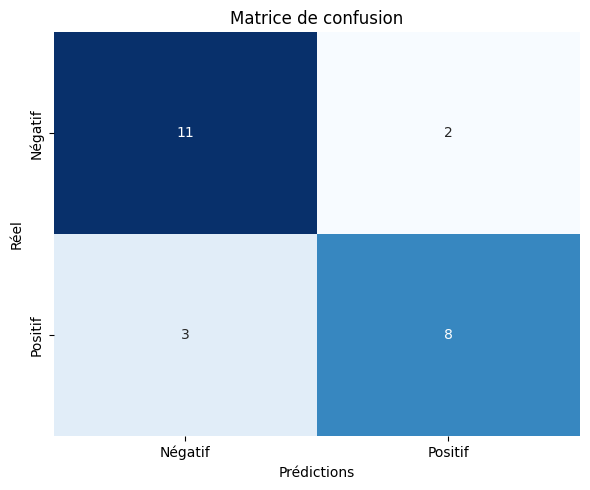

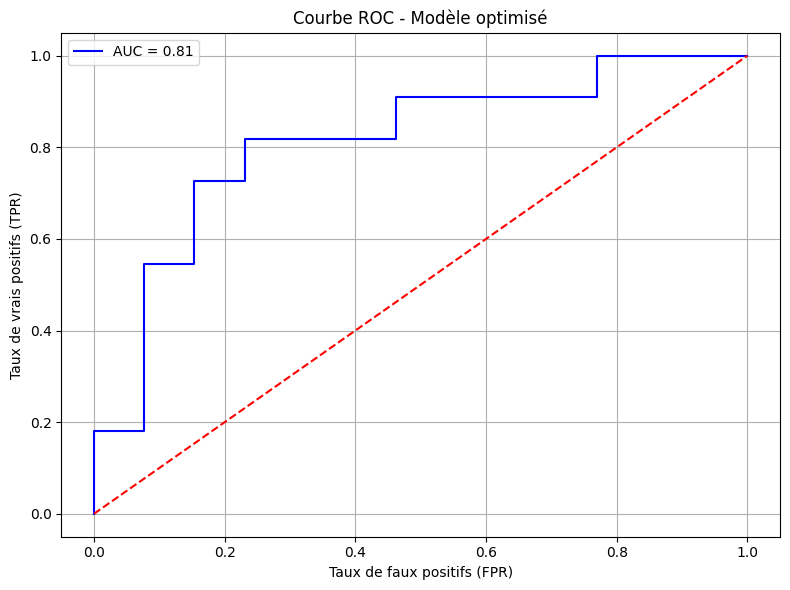

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Prédictions
y_pred_best = best_logreg.predict(X_test_scaled)

# Évaluation globale
print("\nÉvaluation sur le jeu de test :")
print("Accuracy :", round(accuracy_score(y_test, y_pred_best), 3))
print("F1-score :", round(f1_score(y_test, y_pred_best), 3))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_best))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# Courbe ROC et AUC
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("Courbe ROC - Modèle optimisé")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Après avoir sélectionné le meilleur modèle de régression logistique par validation croisée (cf. étape 10), nous l’avons évalué sur le **jeu de test**, resté totalement indépendant durant l’entraînement.

---

### Résultats globaux

- **Accuracy** : 0.792  
- **F1-score** : 0.762

**Rapport de classification :**

| Classe | Précision | Rappel | F1-score | Support |
|--------|-----------|--------|----------|---------|
| 0 (sain)   | 0.79 | 0.85 | 0.81 | 13 |
| 1 (malade) | 0.80 | 0.73 | 0.76 | 11 |
| **Moyenne (macro)** | 0.79 | 0.79 | 0.79 | 24 |

Le **compromis entre précision et rappel est bien équilibré**, et les performances globales sont comparables (légèrement inférieures en F1) à celles obtenues avec le modèle simple (étape 8), malgré une régularisation L1 imposée.

---

### Matrice de confusion

La matrice ci-dessous permet de visualiser les performances de prédiction classe par classe :

|         | Prédit : 0 | Prédit : 1 |
|---------|------------|------------|
| **Réel : 0** | 11         | 2          |
| **Réel : 1** | 3          | 8          |

- **11 vrais négatifs** et **8 vrais positifs** correctement identifiés
- **2 faux positifs** et **3 faux négatifs**

Le modèle présente une **bonne capacité à identifier les deux classes**, même si quelques cas malades sont encore manqués (ce qui est toujours critique dans un contexte médical).

---

### Courbe ROC et AUC

La courbe ROC du modèle sur le jeu de test confirme une **bonne capacité discriminante**, avec une **aire sous la courbe (AUC) de 0.81**.

Cela signifie qu’en moyenne, le modèle classe un individu malade avec une probabilité plus élevée qu’un individu sain dans **81 % des cas**.

La courbe ROC est bien au-dessus de la diagonale (modèle aléatoire), ce qui valide la qualité du modèle.

---

### Conclusion

Le modèle optimisé offre un **compromis robuste entre performance et parcimonie**, avec :
- une régularisation L1 qui limite le surajustement,
- une stabilité démontrée par la validation croisée,
- des performances solides sur le test.

Cette évaluation confirme que la régression logistique constitue un **modèle fiable et interprétable** sur ce jeu de données, bien qu’il soit possible d’envisager des modèles non linéaires pour améliorer encore les résultats.


# Étape 12 — Comparaison des variantes de régression logistique


                        Modèle  Accuracy  F1-score    AUC
0                LogReg simple     0.792     0.783  0.811
1  LogReg optimisé (L1, C=100)     0.792     0.762  0.811


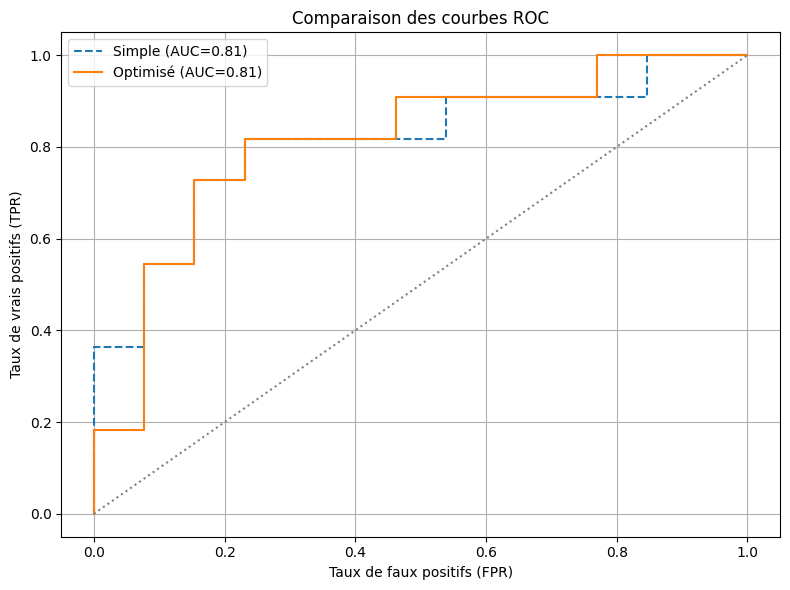

<Figure size 1000x600 with 0 Axes>

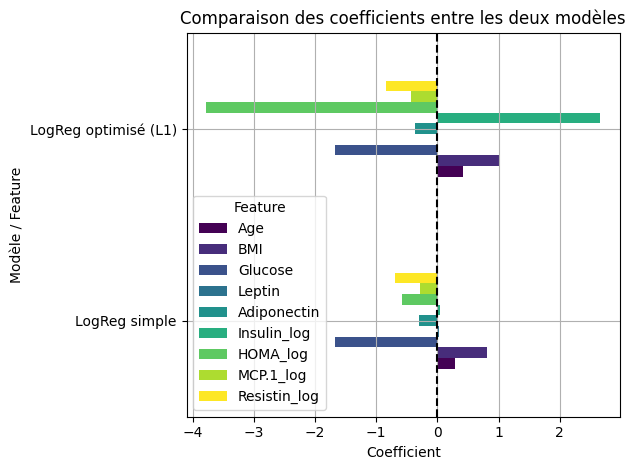

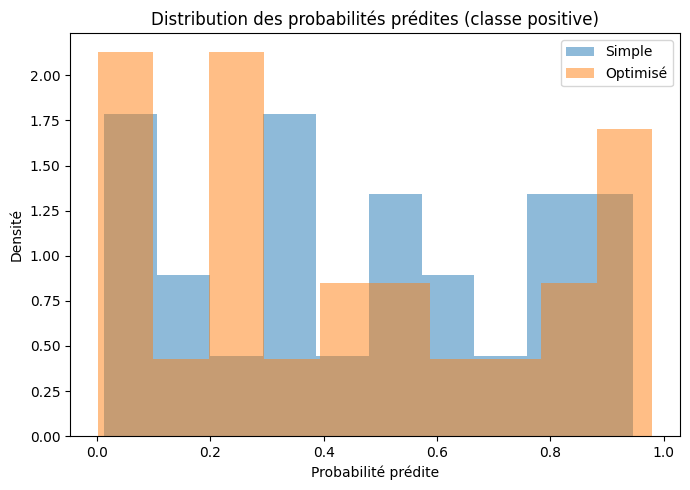

y_test  Pred_simple  Pred_optimisé
66        0            1              1
5         1            0              0
80        0            1              0
16        1            1              0
103       0            1              1
13        1            0              0

In [ ]:
from sklearn.metrics import (roc_auc_score)

# 1. Calcul des probabilités 
y_proba_simple = logreg_simple.predict_proba(X_test_scaled)[:, 1]
y_proba_best = best_logreg.predict_proba(X_test_scaled)[:, 1]

# 2. Récapitulatif des scores
results = pd.DataFrame({
    'Modèle': ['LogReg simple', 'LogReg optimisé (L1, C=100)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_simple),
        accuracy_score(y_test, y_pred_best)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_simple),
        f1_score(y_test, y_pred_best)
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_simple),
        roc_auc_score(y_test, y_proba_best)
    ]
})
print(results.round(3))

# 3. Courbes ROC superposées
fpr_simple, tpr_simple, _ = roc_curve(y_test, y_proba_simple)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_simple, tpr_simple, '--', label=f'Simple (AUC={roc_auc_score(y_test, y_proba_simple):.2f})')
plt.plot(fpr_best, tpr_best, '-', label=f'Optimisé (AUC={roc_auc_score(y_test, y_proba_best):.2f})')
plt.plot([0, 1], [0, 1], linestyle=':', color='grey')
plt.title("Comparaison des courbes ROC")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Comparaison des coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'LogReg simple': logreg_simple.coef_[0],
    'LogReg optimisé (L1)': best_logreg.coef_[0]
}).set_index('Feature')

plt.figure(figsize=(10, 6))
coef_df.T.plot(kind='barh', colormap='viridis')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Comparaison des coefficients entre les deux modèles")
plt.xlabel("Coefficient")
plt.ylabel("Modèle / Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Distribution des probabilités prédites (classe 1)
plt.figure(figsize=(7, 5))
plt.hist(y_proba_simple, bins=10, alpha=0.5, label="Simple", density=True)
plt.hist(y_proba_best, bins=10, alpha=0.5, label="Optimisé", density=True)
plt.title("Distribution des probabilités prédites (classe positive)")
plt.xlabel("Probabilité prédite")
plt.ylabel("Densité")
plt.legend()
plt.tight_layout()
plt.show()

# 6. Analyse des erreurs par individu
erreurs = pd.DataFrame({
    'y_test': y_test.values,
    'Pred_simple': y_pred_simple,
    'Pred_optimisé': y_pred_best
}, index=y_test.index)

# Afficher uniquement les cas mal classés par au moins un des deux modèles
diff = erreurs.query("Pred_simple != y_test or Pred_optimisé != y_test")
display(diff)


Nous avons comparé deux versions du modèle de régression logistique :
- un **modèle simple**, sans régularisation explicite (paramètres par défaut),
- un **modèle optimisé**, avec régularisation L1 (`penalty='l1'`, `C=100`), déterminé via validation croisée.

---

### Performances globales

| Modèle                      | Accuracy | F1-score | AUC   |
|-----------------------------|----------|----------|-------|
| LogReg simple               | 0.792    | 0.783    | 0.811 |
| LogReg optimisé (L1, C=100) | 0.792    | 0.762    | 0.811 |

Les deux modèles atteignent une **précision identique (0.792)** et une **capacité discriminante équivalente (AUC = 0.811)**.  
Le **modèle simple obtient un F1-score légèrement supérieur**, indiquant un meilleur équilibre entre rappel et précision sur la classe positive.

---

### Courbes ROC

Les courbes ROC confirment que les deux modèles sont très proches en termes de performance globale.  
Ils possèdent la même AUC (0.81), et suivent des trajectoires similaires sur l’ensemble de test.

---

### Comparaison des coefficients

Le graphe ci-dessous compare les poids attribués à chaque variable par les deux modèles.

- Le modèle optimisé par L1 **modifie fortement certains coefficients**, en particulier ceux de `Insulin_log` et `HOMA_log`, ce qui indique une régularisation efficace.
- D'autres variables comme `Glucose` ou `BMI` conservent un rôle dominant dans les deux modèles.

Cette comparaison renforce l’idée que le **modèle régularisé est plus parcimonieux**, tout en conservant l’essentiel du signal prédictif.

---

### Distribution des probabilités `predict_proba`

Nous avons visualisé les distributions des probabilités prédites pour la classe positive par les deux modèles.

- Les deux distributions couvrent des plages similaires, mais le modèle régularisé produit **des prédictions légèrement plus extrêmes** (plus proches de 0 ou 1),
- Cela peut indiquer une **plus grande confiance dans certaines décisions**, ou une **meilleure séparation des classes**.

---

### Comparaison des erreurs

Nous avons identifié les cas où les prédictions diffèrent entre les deux modèles.  
Seulement quelques individus sont classés différemment, ce qui explique les scores très proches.  
Exemple :

| id | Vérité | Simple | Optimisé |
|----|--------|--------|----------|
| 80 | 0      | 1      | 0        |
| 5  | 1      | 0      | 0        |

Cela confirme que la **structure des erreurs est différente**, même si les performances agrégées sont proches.

---

### Analyse finale

Les deux modèles sont proches en termes de performance, mais présentent :
- des **différences structurelles dans les coefficients**,
- des **légères différences de comportement** sur les individus en bord de décision,
- et une **forme de décision plus régulière** dans le cas du modèle L1.

---

### Conclusion

| Modèle                     | Avantage principal |
|---------------------------|--------------------|
| **LogReg simple**         | Légère supériorité en F1-score |
| **LogReg optimisé (L1)**  | Parcimonie, coefficients régularisés, meilleure interprétabilité |

En pratique, les deux modèles peuvent être retenus selon le compromis souhaité entre performance brute et simplicité structurelle.  
Le modèle L1 est particulièrement pertinent dans un objectif de généralisation ou de sélection automatique de variables.


# Étape 13 (bonus): application de l'ACP pour essayer d'améliorer les modèles

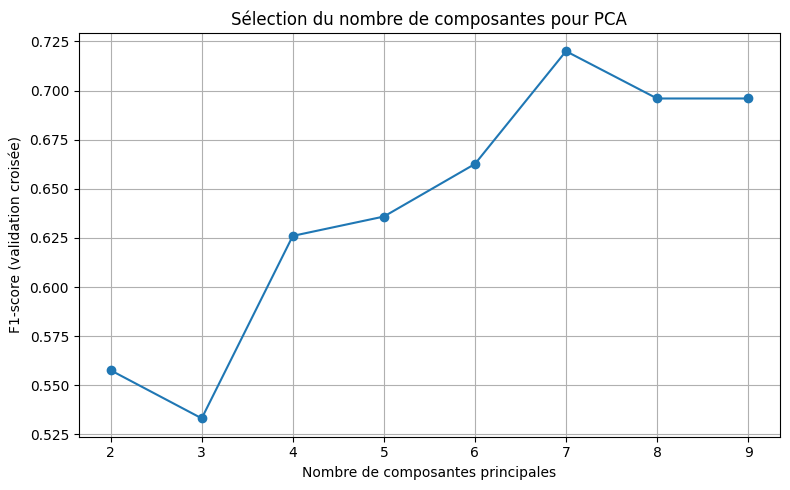

Meilleurs hyperparamètres : {'C': 1.6681005372000592, 'penalty': 'l2', 'solver': 'liblinear'}
F1-score moyen (validation croisée) : 0.715

 Évaluation sur le jeu de test :
Accuracy : 0.833
F1-score : 0.818
AUC : 0.832

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.82      0.82      0.82        11

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



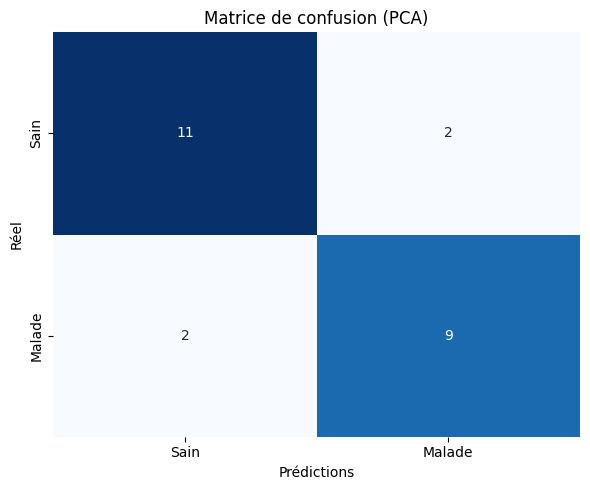

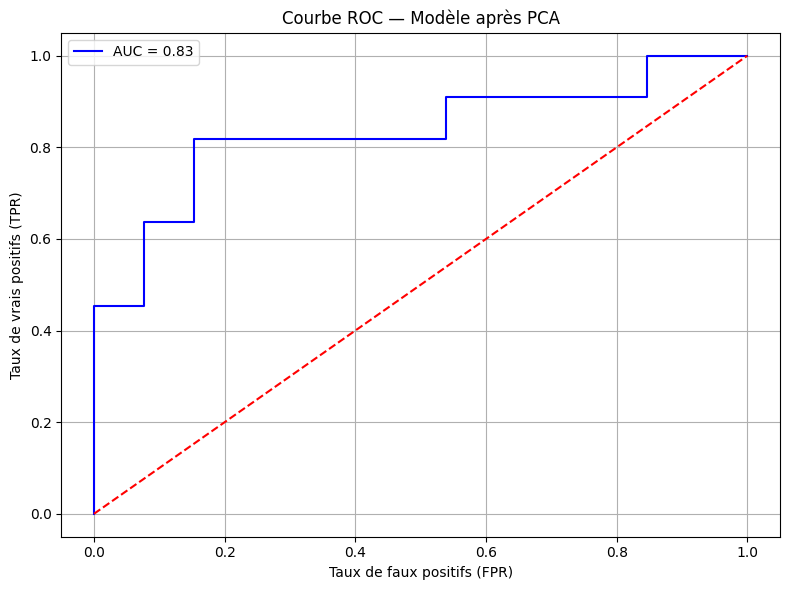

In [61]:
from sklearn.decomposition import PCA


# Étape 1 — Sélection du meilleur nombre de composantes via validation croisée
scores = []
components_range = range(2, X_train_scaled.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n, svd_solver='full', random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    model = LogisticRegression(random_state=42, max_iter=1000)
    score = cross_val_score(model, X_train_pca, y_train, cv=10, scoring='f1').mean()
    scores.append(score)

# Tracé des performances
plt.figure(figsize=(8, 5))
plt.plot(components_range, scores, marker='o')
plt.title("Sélection du nombre de composantes pour PCA")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("F1-score (validation croisée)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Étape 2 — Application du PCA avec le meilleur n
n_best = components_range[np.argmax(scores)]
pca_final = PCA(n_components=n_best, svd_solver='full', random_state=42)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

# Étape 3 — Optimisation du modèle via GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-2, 3, 10),
    'solver': ['liblinear']  # nécessaire pour l1
}
logreg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train_pca, y_train)

best_model = grid_search.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("F1-score moyen (validation croisée) :", round(grid_search.best_score_, 3))

# Étape 4 — Évaluation finale sur le jeu de test
y_pred_pca = best_model.predict(X_test_pca)
y_proba_pca = best_model.predict_proba(X_test_pca)[:, 1]

print("\n Évaluation sur le jeu de test :")
print("Accuracy :", round(accuracy_score(y_test, y_pred_pca), 3))
print("F1-score :", round(f1_score(y_test, y_pred_pca), 3))
print("AUC :", round(roc_auc_score(y_test, y_proba_pca), 3))
print("\nClassification Report :\n", classification_report(y_test, y_pred_pca))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Sain', 'Malade'], yticklabels=['Sain', 'Malade'])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion (PCA)")
plt.tight_layout()
plt.show()

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_pca)
auc_value = roc_auc_score(y_test, y_proba_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC — Modèle après PCA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



L'objectif de cette étape est d'examiner si une réduction de dimension par Analyse en Composantes Principales (PCA) peut améliorer les performances du modèle de classification.

---

### Justification

Même après transformation logarithmique et standardisation, les variables explicatives peuvent contenir des corrélations redondantes ou du bruit peu informatif. Le PCA permet de :
- projeter les données dans un nouvel espace de dimension réduite,
- concentrer l’essentiel de la variance sur quelques composantes principales,
- stabiliser l’apprentissage sur petits jeux de données en atténuant la variance inutile.

---

### Méthodologie

1. Le PCA est appliqué sur les données standardisées (`X_train_scaled`) via `sklearn.decomposition.PCA`.
2. Les performances de classification sont évaluées en fonction du nombre de composantes principales, de 2 à 9 (limite fixée par le nombre de variables d'origine).
3. À chaque itération, un modèle de régression logistique est entraîné avec validation croisée (cv=10) pour mesurer le F1-score moyen.
4. Le nombre optimal de composantes est sélectionné en maximisant ce score.
5. Enfin, le modèle optimal est réentraîné sur l’ensemble réduit et évalué sur le jeu de test.

---

### Sélection du nombre de composantes

La figure ci-dessous montre l'évolution du F1-score moyen en fonction du nombre de composantes principales :

> *Figure – Sélection du nombre de composantes (PCA)*

Le maximum est atteint à 7 composantes, avec un F1-score de validation croisée de 0.715. Au-delà, le score stagne, ce qui indique que les dernières composantes contiennent peu d'information discriminante utile.

---

### Résultats finaux sur le jeu de test

Après réduction à 7 composantes, puis optimisation des hyperparamètres de la régression logistique (`C`, `penalty`) via `GridSearchCV`, les résultats obtenus sont les suivants :

- Accuracy : 0.833
- F1-score : 0.818
- AUC : 0.832

#### Classification report :

| Classe       | Précision | Rappel | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| 0 (sain)     | 0.85      | 0.85   | 0.85     | 13      |
| 1 (malade)   | 0.82      | 0.82   | 0.82     | 11      |
| Macro avg    | 0.83      | 0.83   | 0.83     | 24      |

---

### Matrice de confusion

|               | Prédit : sain | Prédit : malade |
|---------------|----------------|------------------|
| Réel : sain   | 11             | 2                |
| Réel : malade | 2              | 9                |

Le modèle après PCA parvient à bien équilibrer les deux classes, avec un nombre réduit de faux positifs et de faux négatifs.

---

### Courbe ROC

La courbe ROC confirme une capacité discriminante élevée, avec une AUC de 0.83. Cela signifie que le modèle est capable, dans 83 % des cas, d’attribuer une probabilité plus élevée à une observation positive qu’à une observation négative.

---

### Conclusion

L’application du PCA classique avec 7 composantes principales :
- améliore légèrement les performances globales par rapport aux modèles sans réduction de dimension,
- stabilise l’apprentissage sur un jeu de données restreint,
- conserve une bonne capacité discriminante tout en simplifiant la représentation des données.

Ces résultats valident l’intérêt de la réduction de dimension par PCA linéaire, et justifient son intégration finale dans le pipeline supervisé.
